In [3]:
import numpy as np
from vpi.io import *
from collections import *

In [4]:
def neighbors_8(f, pto):
    list_of_neighbors = []
    n1, n2 = f.shape
    if (pto[0] - 1) >= 0:
        list_of_neighbors.append((pto[0]-1, pto[1]))
        if (pto[1] -1) >=0:
            list_of_neighbors.append((pto[0]-1, pto[1]-1))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]-1, pto[1]+1))
    if (pto[1] - 1) >= 0:
        list_of_neighbors.append((pto[0], pto[1]-1))
        if (pto[0] + 1) < n1:
            list_of_neighbors.append((pto[0]+1, pto[1]-1))
    if (pto[0] + 1) < n1:
        list_of_neighbors.append((pto[0]+1, pto[1]))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]+1, pto[1]+1))
    if (pto[1] + 1) < n2:
        list_of_neighbors.append((pto[0], pto[1]+1))
    return list_of_neighbors           

In [5]:
def labeling(f, color):
    g = np.zeros(f.shape).astype(int)
    label = 0
    queue = deque()
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if (f[i,j] == color and g[i,j] == 0):
                queue.append((i,j)) #insere no lado direito
                label = label + 1 
                g[i,j] = label
                while queue:
                    proximo = queue.popleft() #remove no lado esquerdo
                    for n in neighbors_8(f, proximo):
                        if (f[n] == color and g[n] == 0):
                            g[n] = label
                            queue.append(n)           
    return g

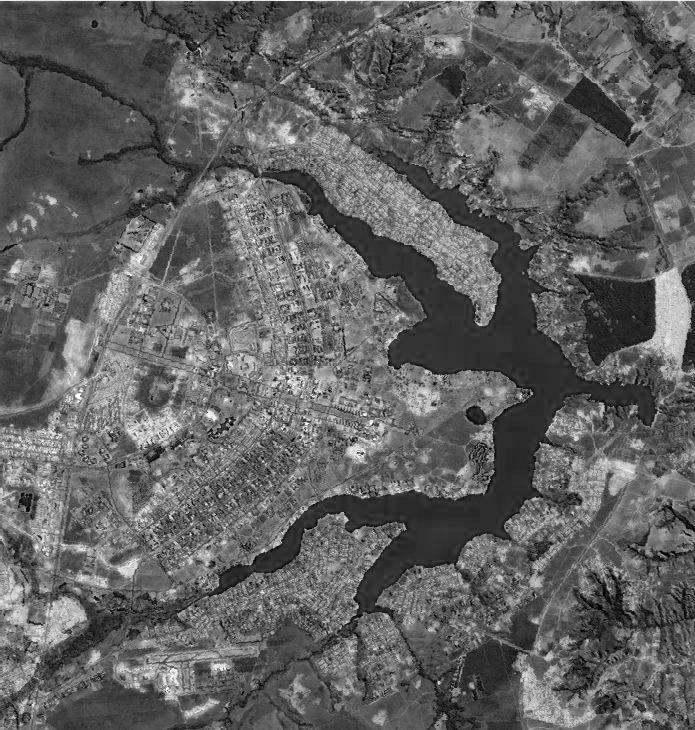

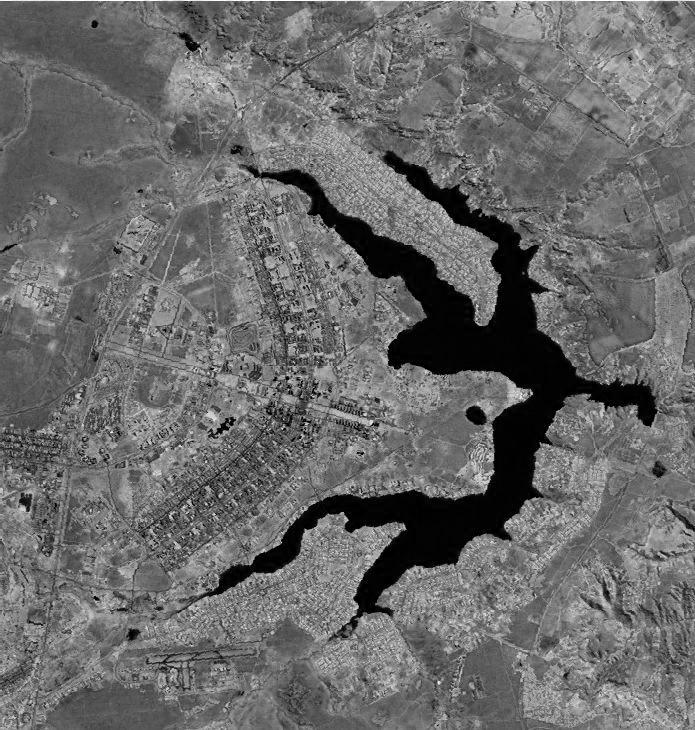

0
255.0
0.0


IndexError: arrays used as indices must be of integer (or boolean) type

In [32]:
TM_3 = read_image("images/TM_3.jpg")
display_image(TM_3)
TM_4 = read_image("images/TM_4.jpg")
display_image(TM_4)
IDVN_num = TM_4 - TM_3
IDVN_den = TM_4 + TM_3
print(IDVN_den.min())
IDVN = np.zeros(IDVN_num.shape)
for i in range(IDVN_num.shape[0]):
    for j in range(IDVN_num.shape[1]):
        if(IDVN_den[i,j] == 0):
            IDVN[i,j] = 1
        else:
            IDVN[i,j] = (IDVN_num[i,j]/IDVN_den[i,j])

ymax = IDVN.max()
ymin = IDVN.min()
print(ymax)
print(ymin)
ymin1 = 0
ymax1 = 255
T = np.arange(256)
T = (((ymax - ymin)/(ymax1 - ymin1))*(T-ymin) - ymin1)
T = T.astype(int)
T[IDVN]